# Plot

In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [76]:
d = 5

# color setting
truth_color = "#FF6B6B"
est_color = "#4D96FF"
refined_color = "#6BCB77"
upper_labels=["\\theta_1","\\theta_2","\\theta_3","\\theta_4","\\theta_5"]

In [77]:
true_posterior_path = os.path.join(os.getcwd(), 'data','ps.npy')
true_posterior_samples = np.load(true_posterior_path)
print(true_posterior_samples.shape)
bandwidth_path = os.path.join(os.getcwd(), 'data','h_mmd.npy')
bandwidth = np.load(bandwidth_path)

(10000, 5)


In [78]:
def plot(mcmc_samples,ps_samples,true_posterior_samples):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(1, 5, figsize=(25, 6))
    true_ps = [1, 1, -1.0, -0.9, 0.6]

    # 定义每个theta_i对应的x轴范围
    x_limits = [
        [0.7, 1.3],  # theta_0
        [0.6, 1.4],  # theta_1
        [-1.5, 1.5],  # theta_2
        [-1.5, 1.5],  # theta_3
        [0, 1.2],  # theta_4
    ]

    for j, ax in enumerate(axs):
        ax.set_xlim(x_limits[j])
        ax.set_xticks(np.linspace(x_limits[j][0], x_limits[j][1], 5))

    for upper_label, j in zip(upper_labels,range(d)):
        sns.kdeplot(
            true_posterior_samples[:, j],
            ax=axs[j],
            fill=False,
            label="posterior",
            color=truth_color,
            linestyle="-.",
            linewidth=1.5,
        )
        sns.kdeplot(
            ps_samples[:, j],
            ax=axs[j],
            fill=False,
            label="BF",
            color=est_color,
            linestyle="-",
            linewidth=1.5,
        )
        sns.kdeplot(
            mcmc_samples[:, j],
            ax=axs[j],
            fill=False,
            label="BF+ABC-MCMC",
            color=refined_color,
            linestyle="--",
            linewidth=1.5,
        )
        axs[j].set_title(f"${upper_label}$", pad=15)
        axs[j].set_ylabel("")

    # save figure
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=3)
    plt.tight_layout(pad=3.0)
    plt.show()

In [79]:
def compute_mmd(x_,y_, bandwidth):
    """
    Compute the mean and standard deviation of the MMD between x and y.
    :param x_: (N_x,d)
    :param y_: (N_y,d)
    :return:
    """
    x = tf.convert_to_tensor(x_, dtype=tf.float32)
    y = tf.convert_to_tensor(y_, dtype=tf.float32)

    xx = tf.matmul(x,tf.transpose(x))
    xy = tf.matmul(x,tf.transpose(y))
    yy = tf.matmul(y,tf.transpose(y))

    rx = tf.reduce_sum(tf.square(x), axis=-1, keepdims=True)
    ry = tf.reduce_sum(tf.square(y), axis=-1, keepdims=True)

    se_xx = rx - 2*xx + tf.transpose(rx)
    se_xy = rx - 2*xy + tf.transpose(ry)
    se_yy = ry - 2*yy + tf.transpose(ry)

    K_xx = tf.exp(-0.5 * se_xx / (bandwidth**2) )
    K_xy = tf.exp( -0.5 * se_xy / (bandwidth**2) )
    K_yy = tf.exp( -0.5 * se_yy / (bandwidth**2) )

    return tf.reduce_mean(K_xx) - 2*tf.reduce_mean(K_xy) + tf.reduce_mean(K_yy)

## Plot

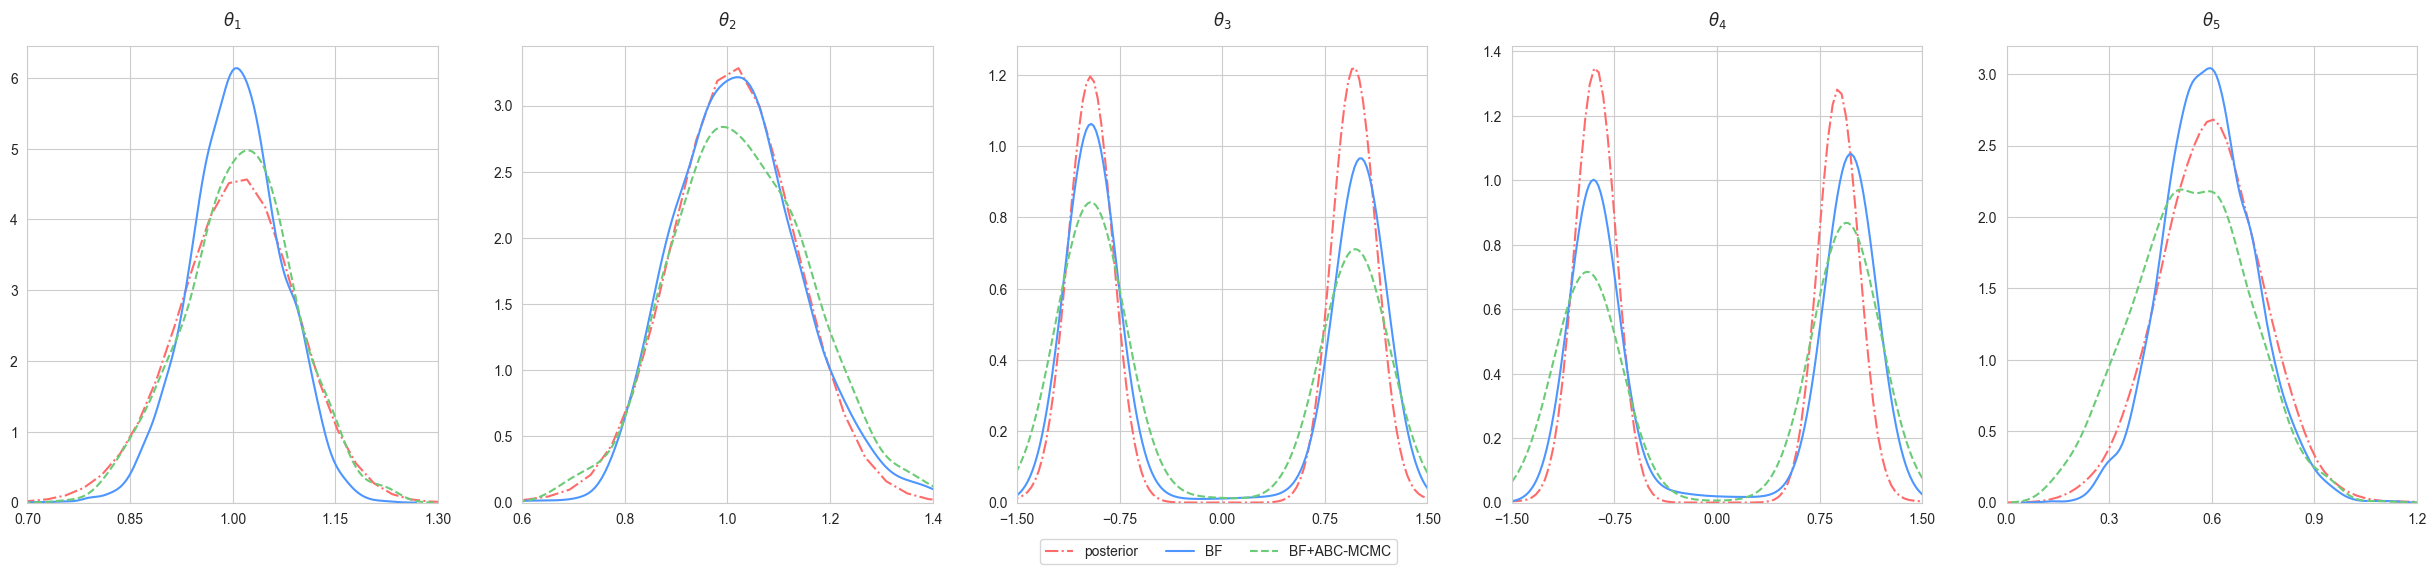

0th mmd: 0.0194619 refinement: 0.01651024


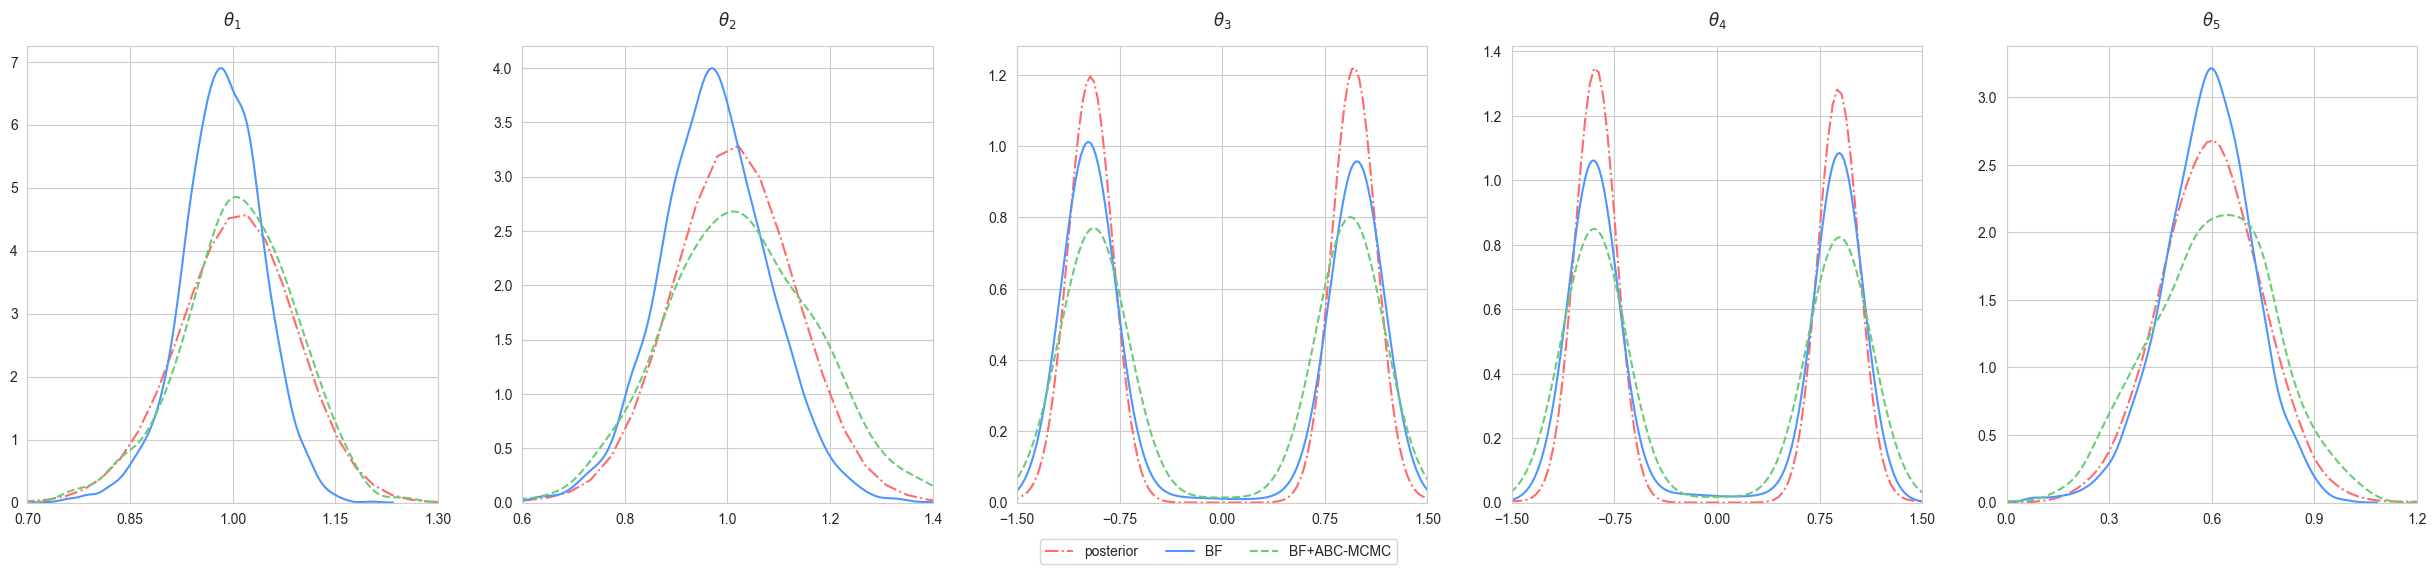

1th mmd: 0.010461882 refinement: 0.007510841


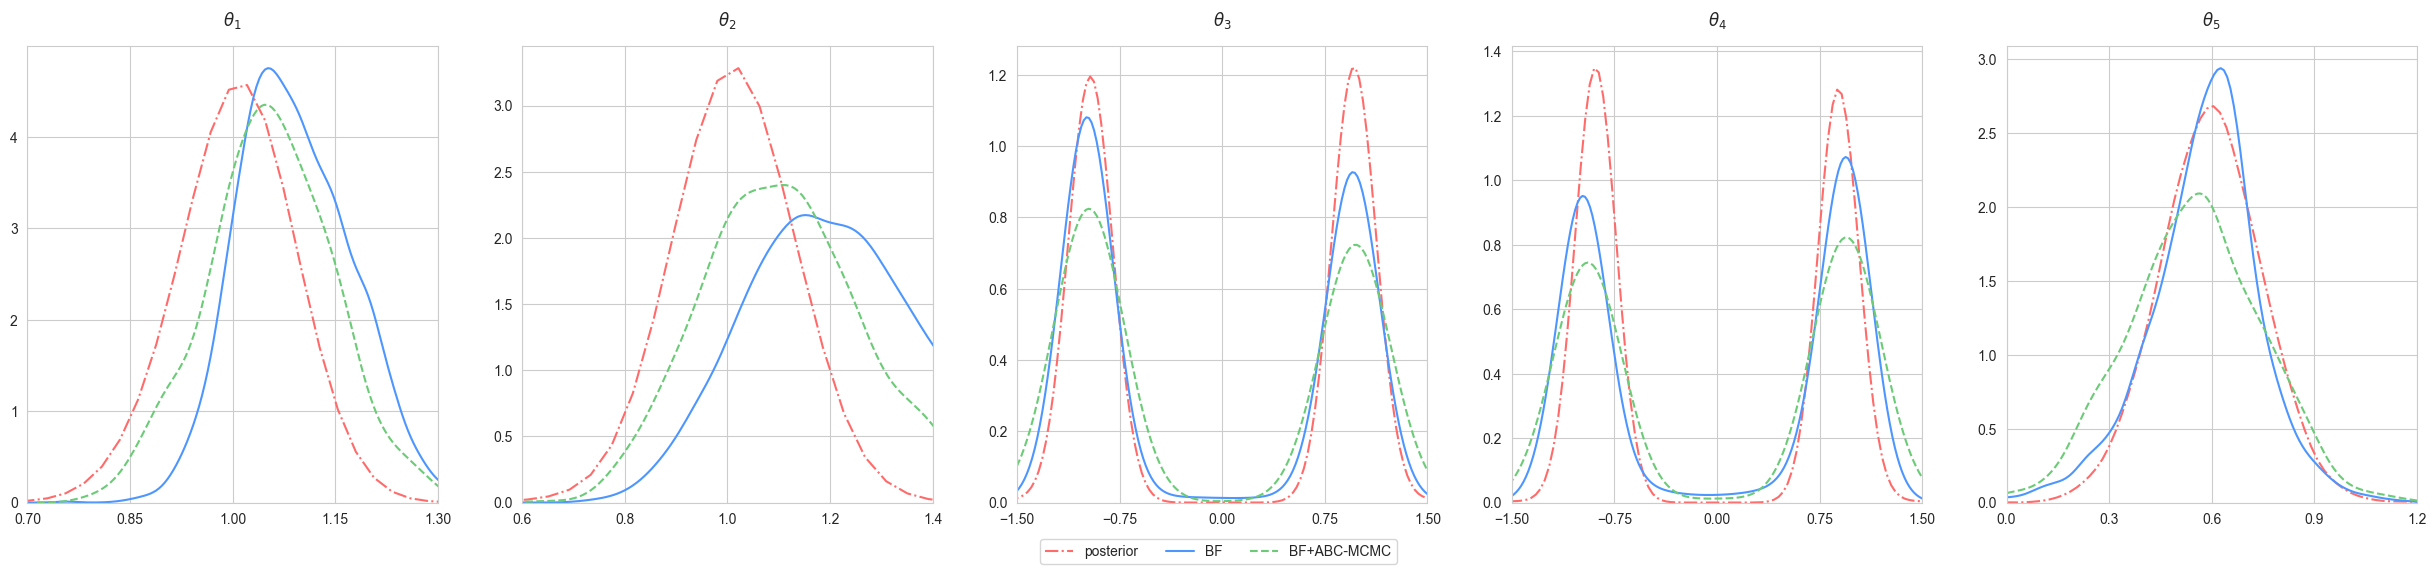

2th mmd: 0.059803702 refinement: 0.026024185


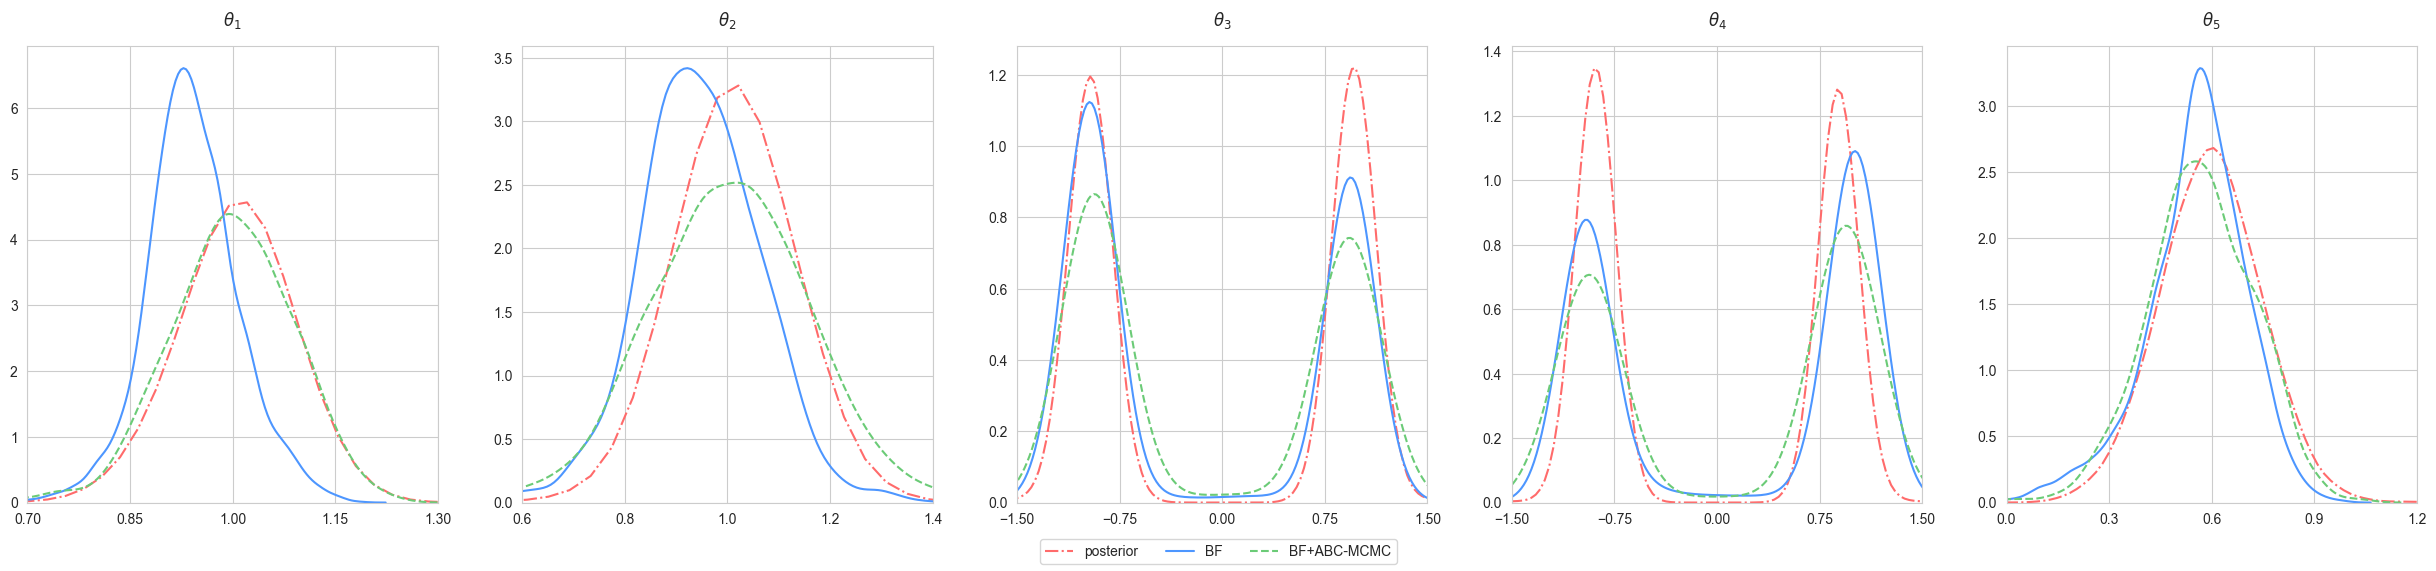

3th mmd: 0.045859396 refinement: 0.015183799


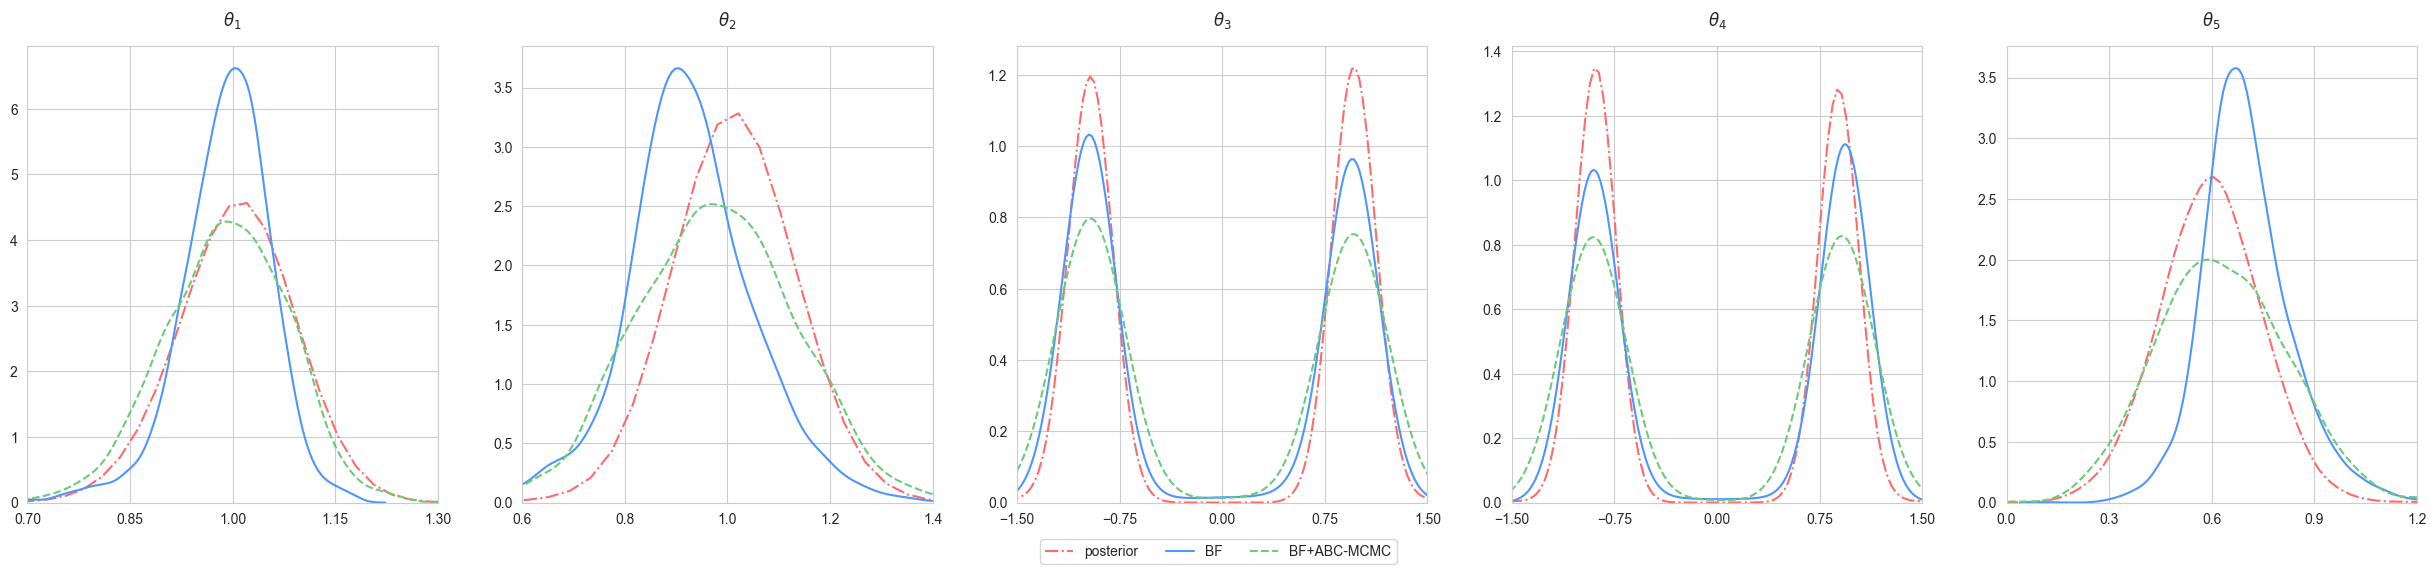

4th mmd: 0.03231827 refinement: 0.009511128


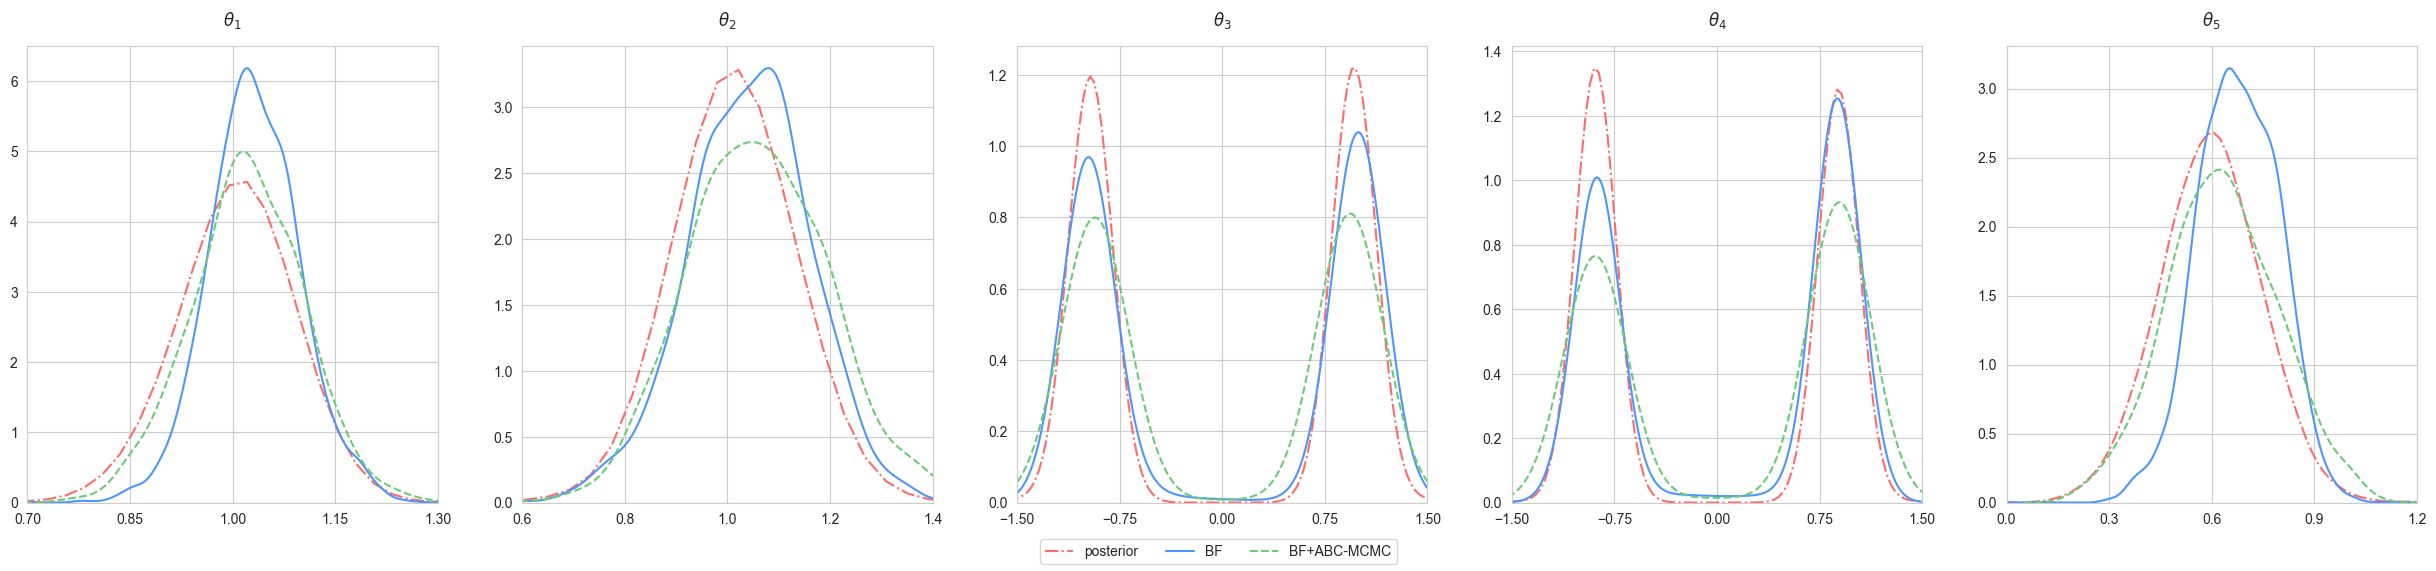

5th mmd: 0.021113023 refinement: 0.010705233


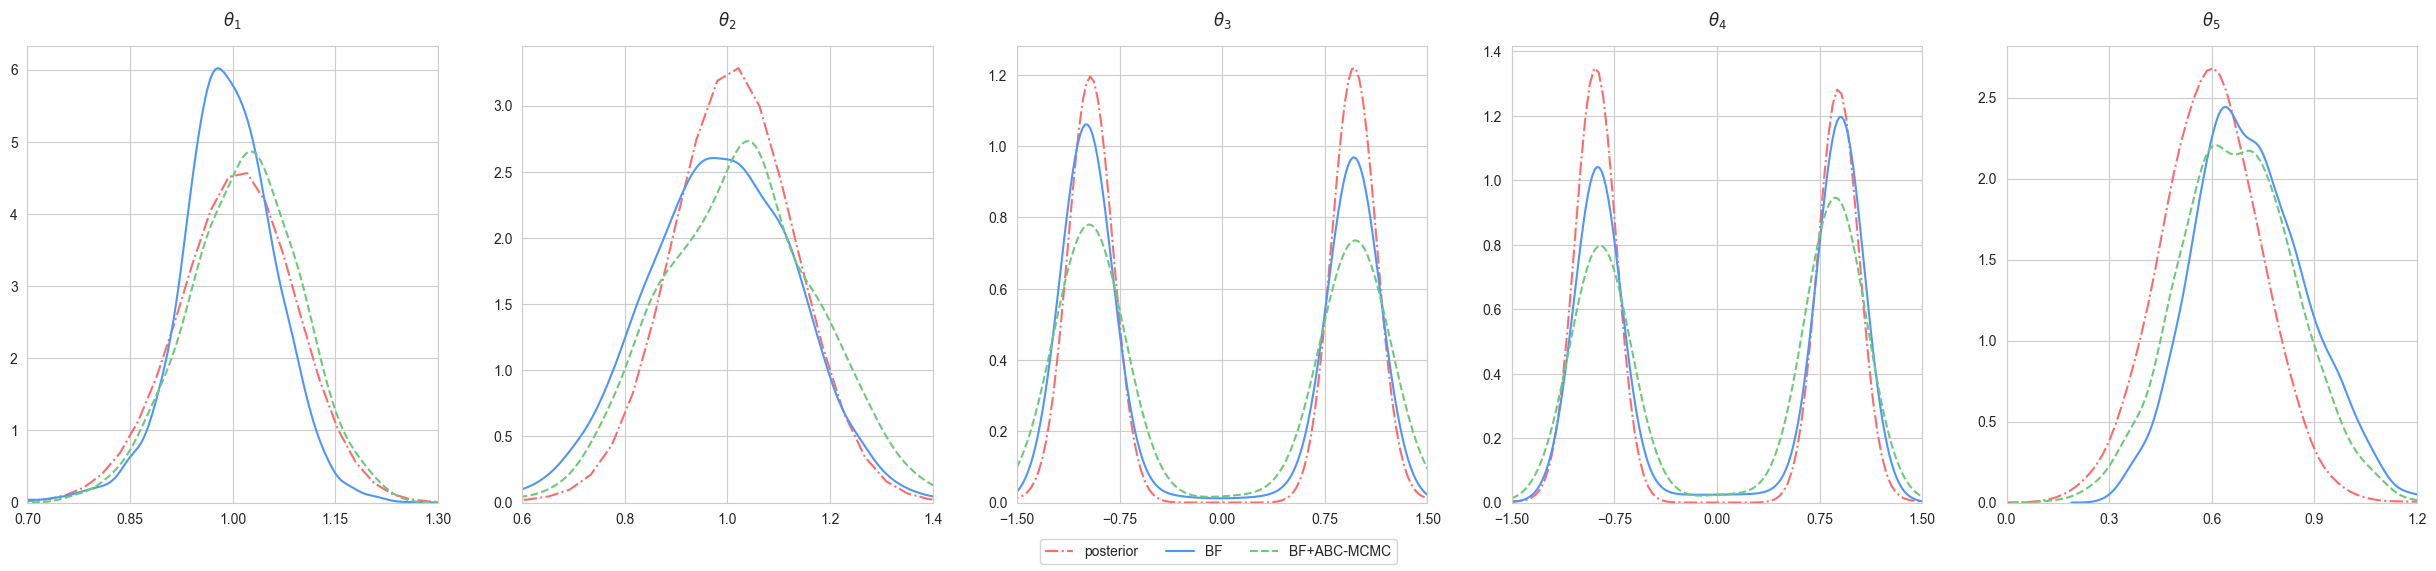

6th mmd: 0.026882716 refinement: 0.015688896


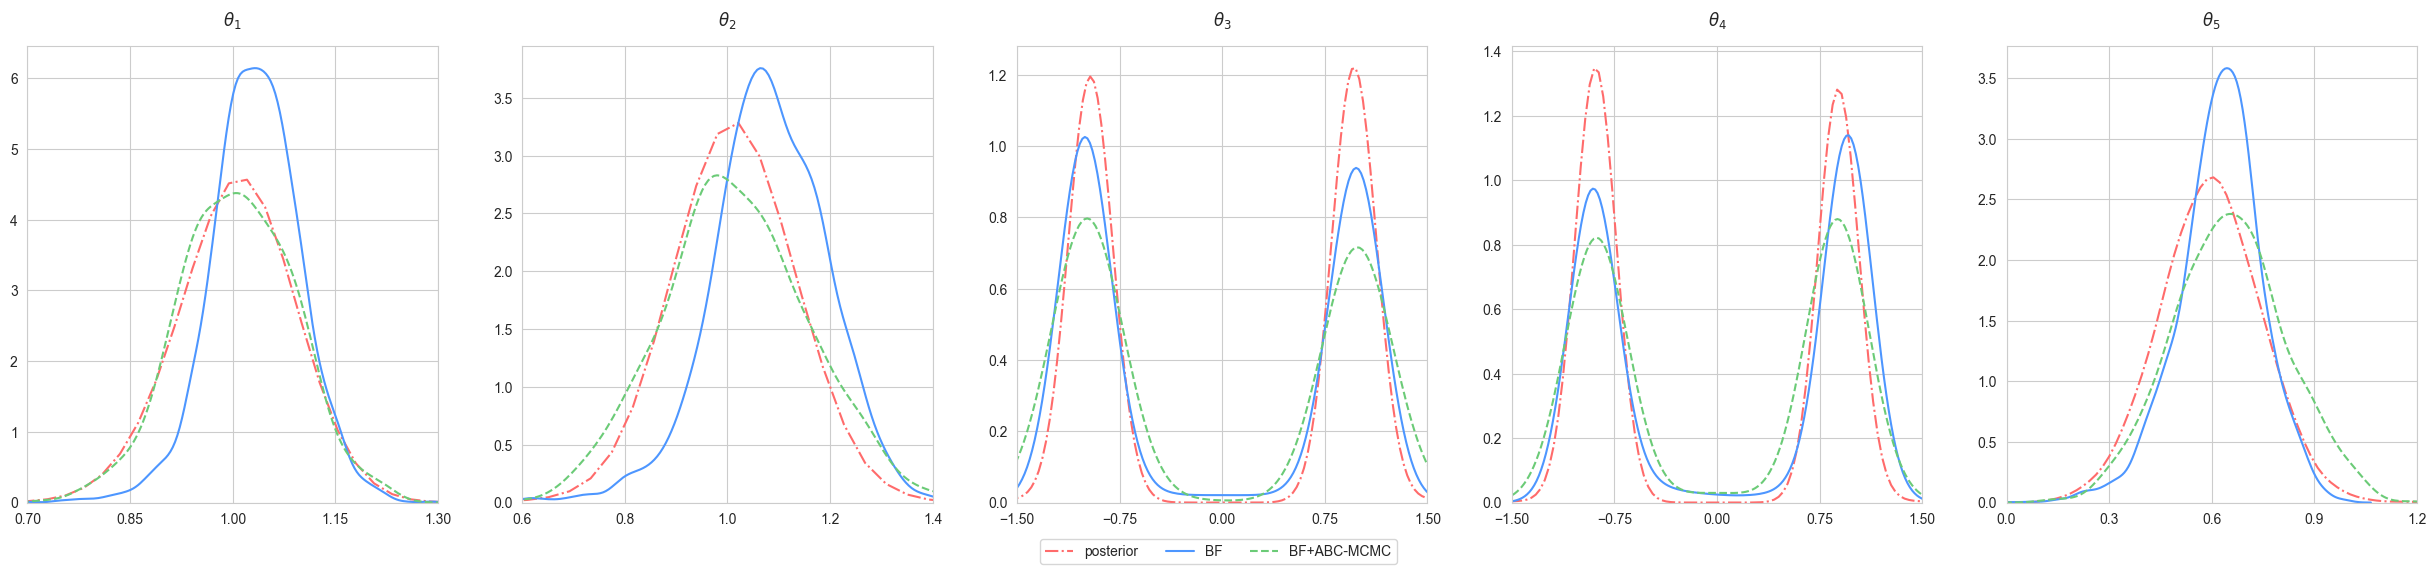

7th mmd: 0.023412094 refinement: 0.009417802


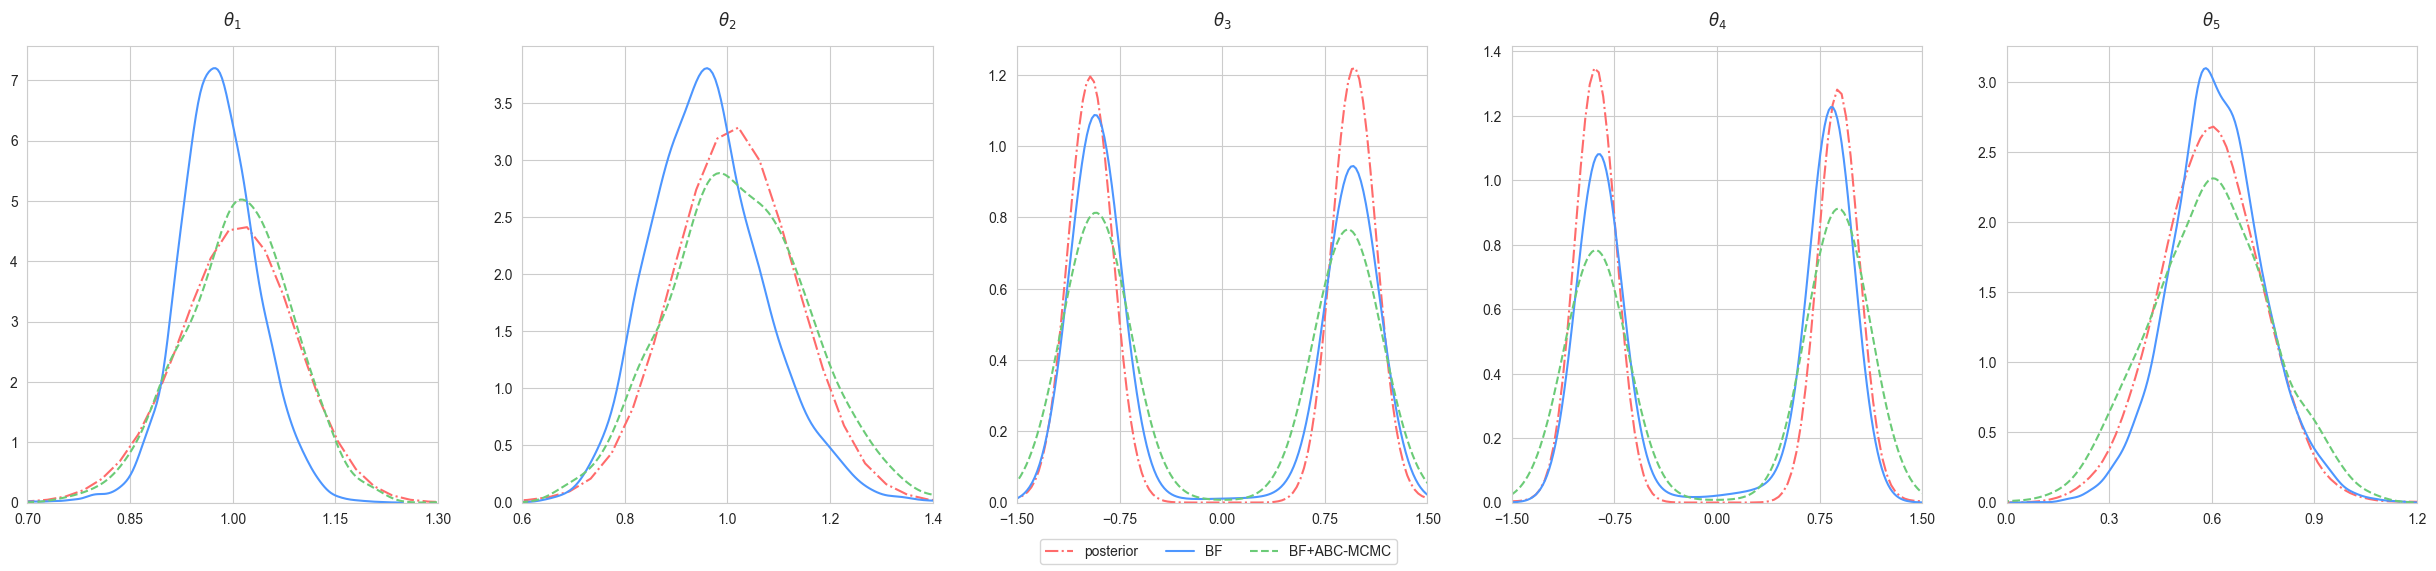

8th mmd: 0.018351093 refinement: 0.009651542


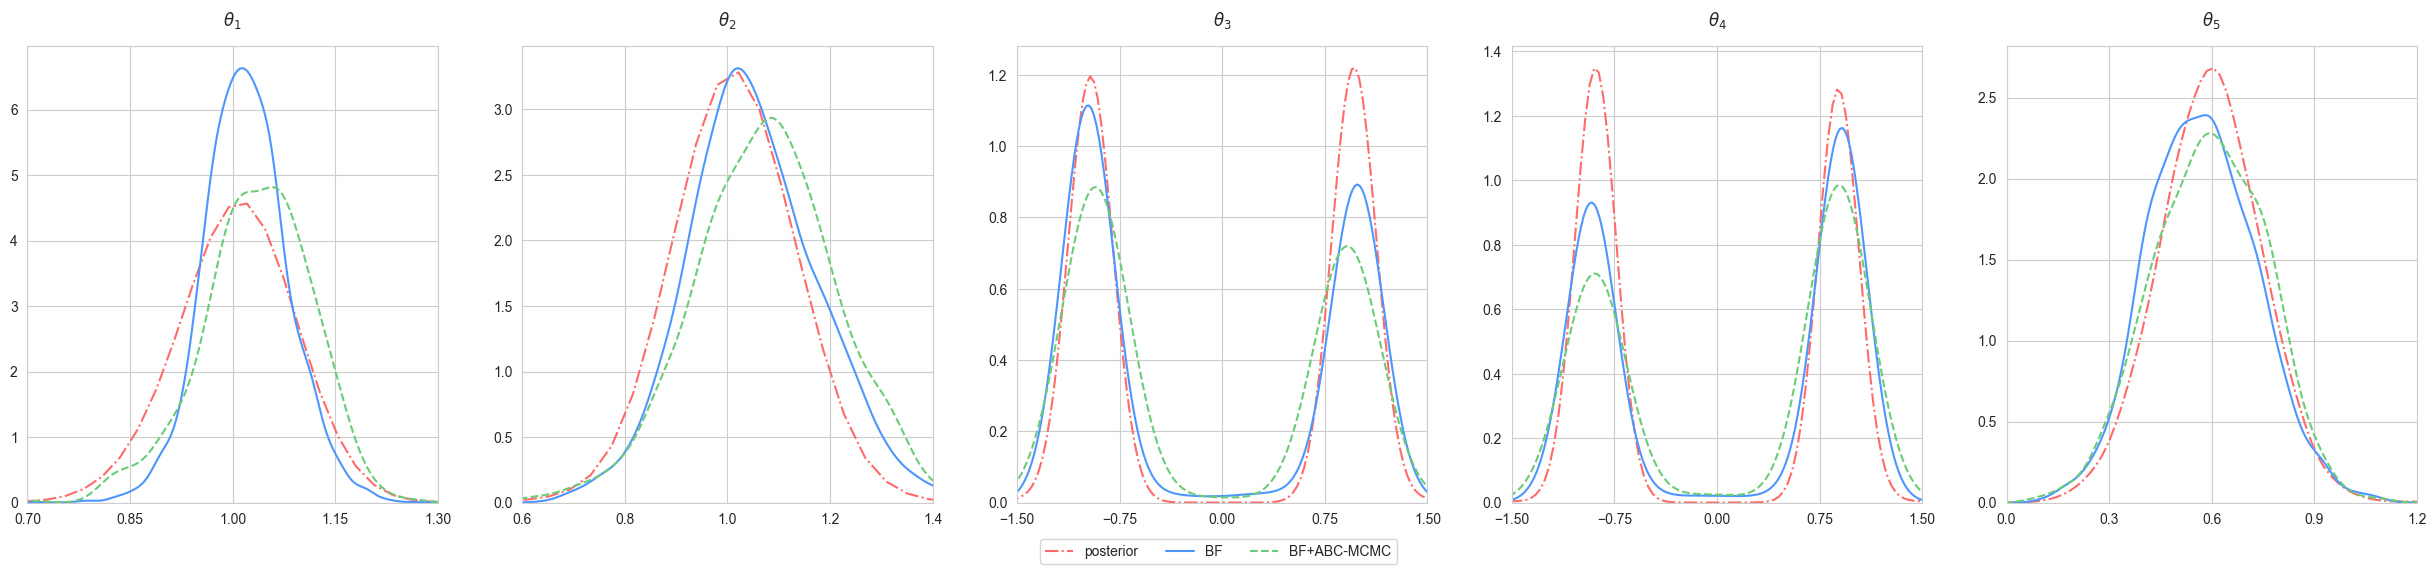

9th mmd: 0.020591408 refinement: 0.01793079


In [73]:

for k in range(10):
    nn_mcmc_samples_path = os.path.join(os.getcwd(), 'result','nn_mcmc_samples')
    kth_mcmc_samples_path = os.path.join(nn_mcmc_samples_path, f'nn_50_mcmc_samples_{k}.npy')
    mcmc_samples_total = np.load(kth_mcmc_samples_path)
    mcmc_samples = mcmc_samples_total[249]

    nn_ps_samples_path = os.path.join(os.getcwd(), 'result','nn_ps')
    nn_kth_ps_path = os.path.join(nn_ps_samples_path, f'nn_50_ps_{k}.npy')
    nn_ps_samples = np.load(nn_kth_ps_path)

    plot(mcmc_samples,nn_ps_samples,true_posterior_samples)
    mmd = compute_mmd(nn_ps_samples,true_posterior_samples,bandwidth)
    mmd_refinement = compute_mmd(mcmc_samples, true_posterior_samples,bandwidth)
    print(f"{k}th mmd:",mmd.numpy(),"refinement:",mmd_refinement.numpy())

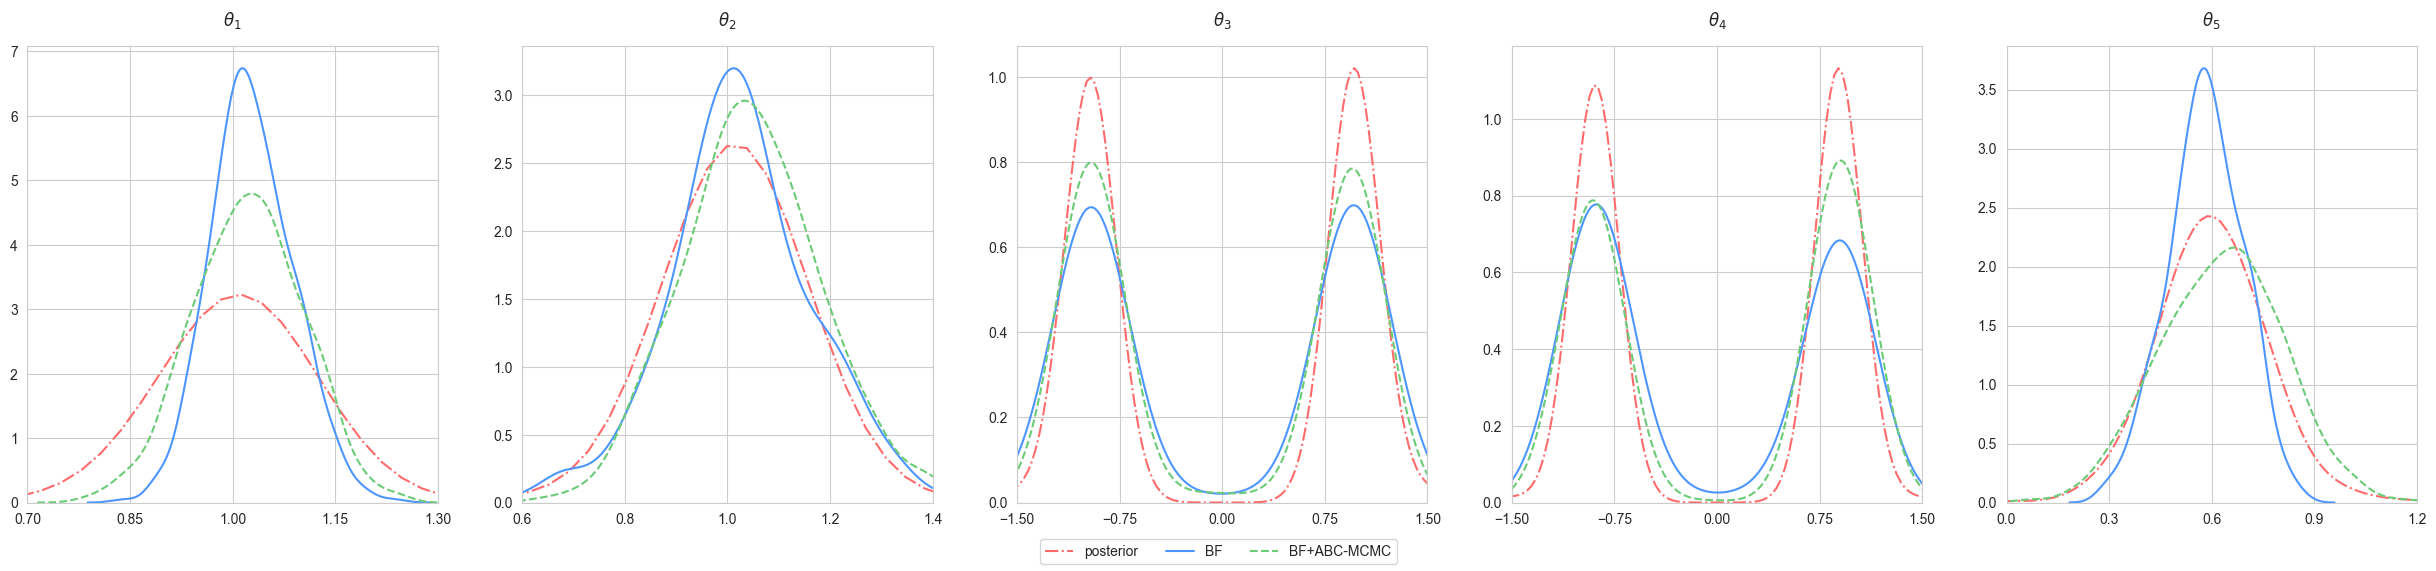

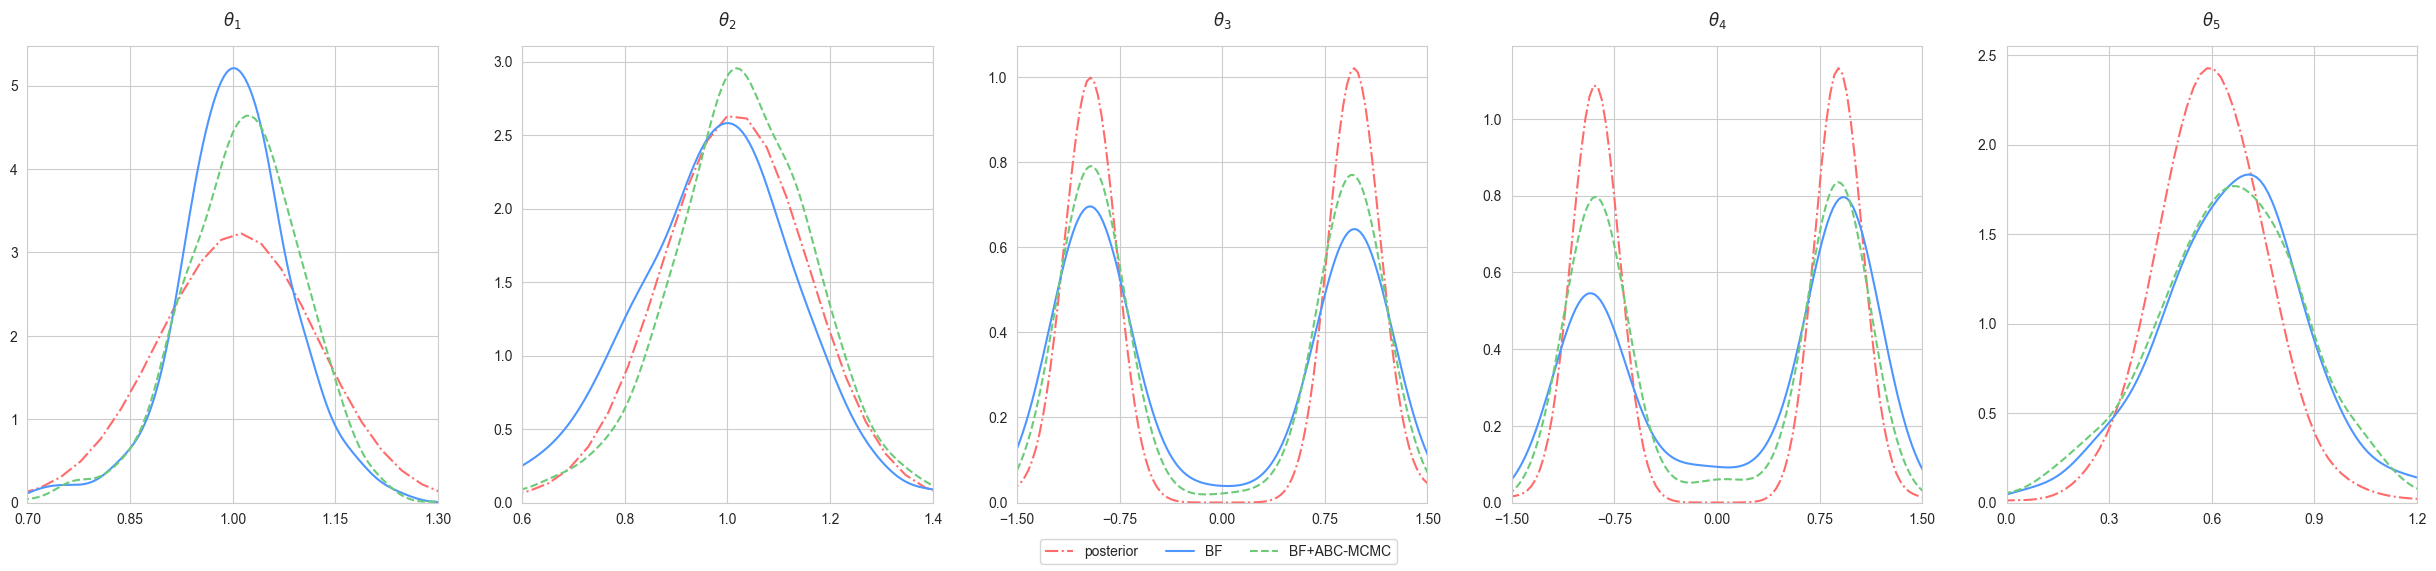

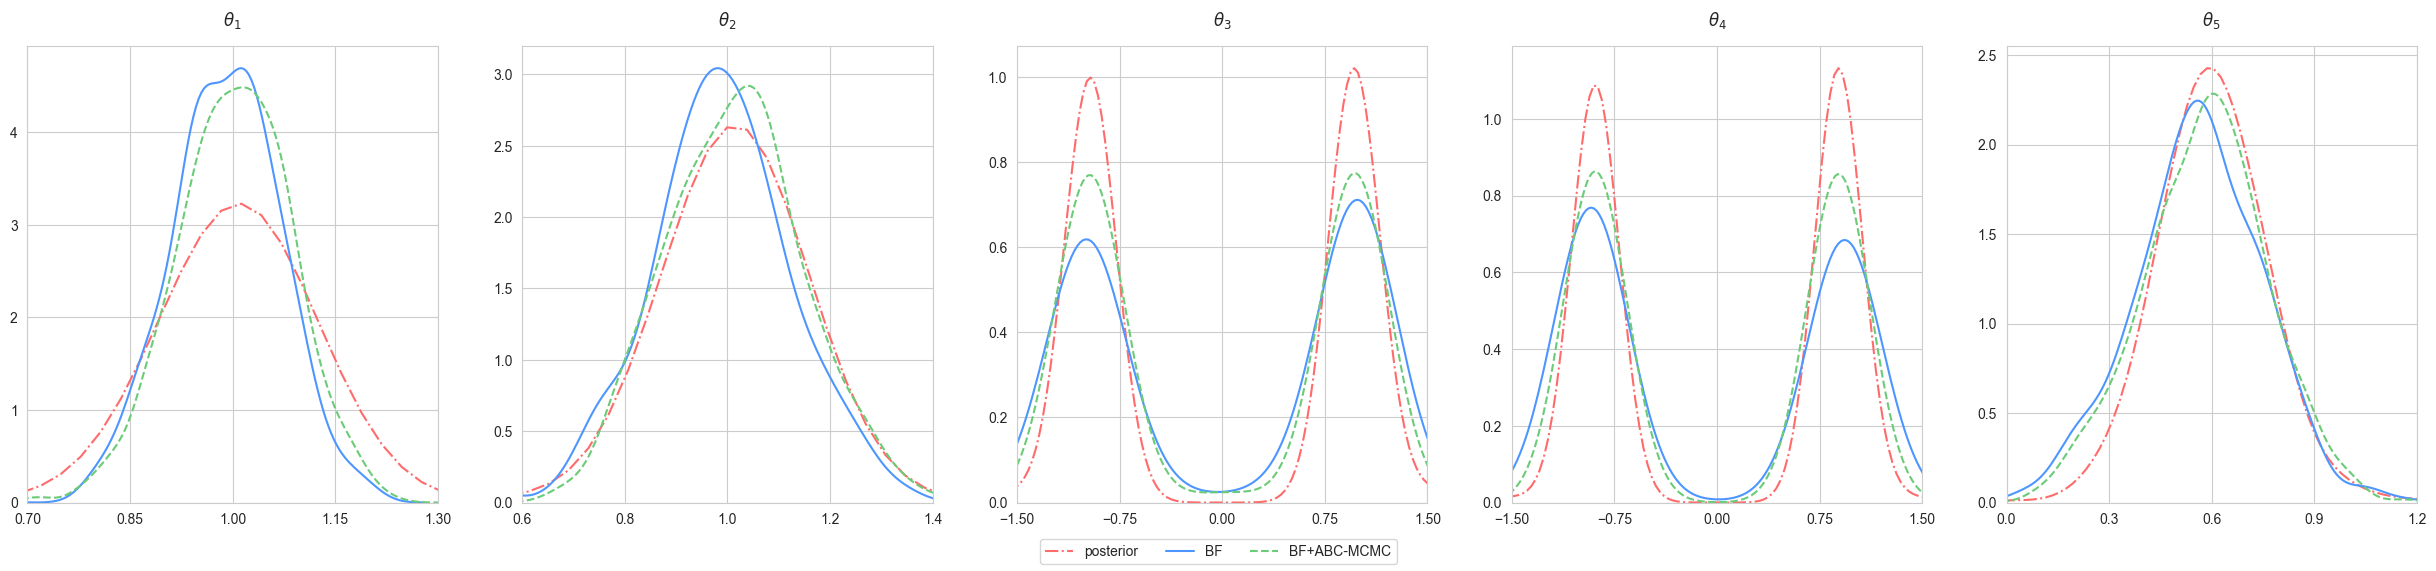

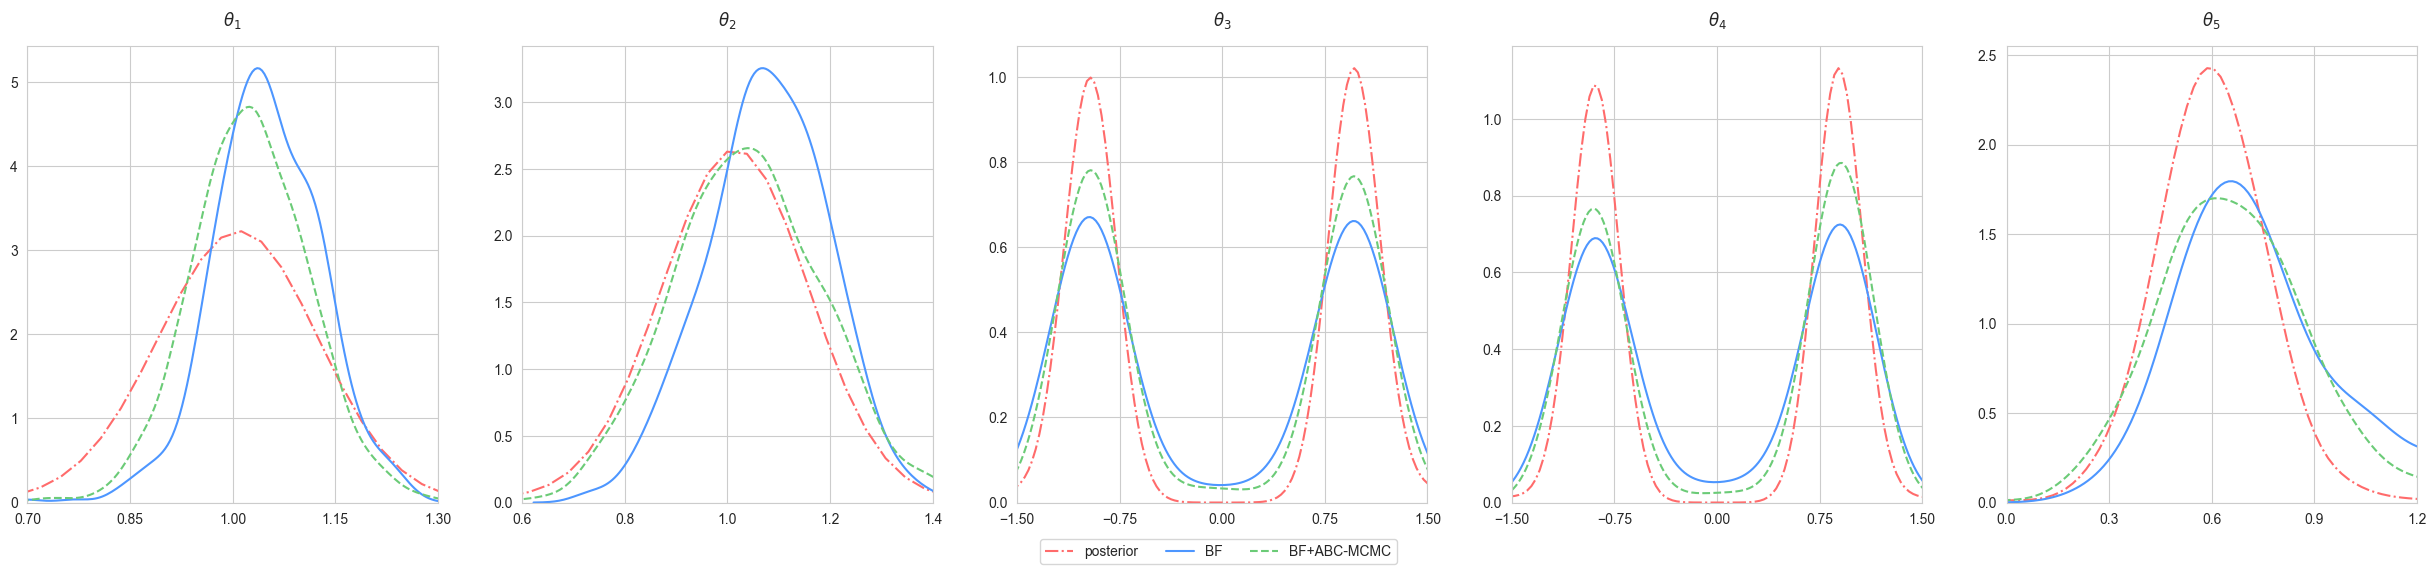

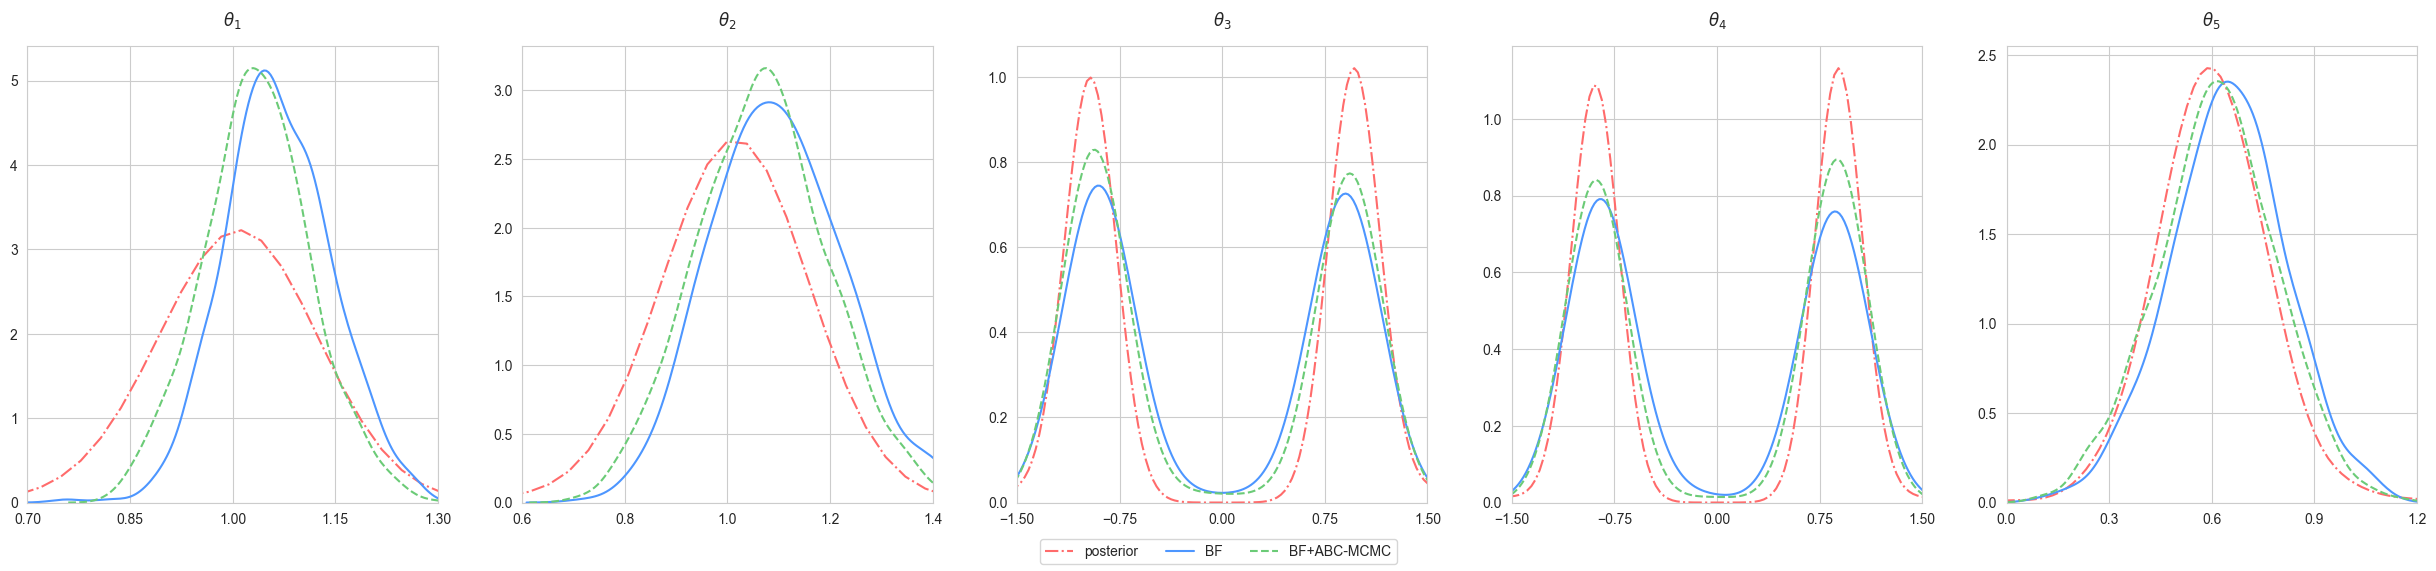

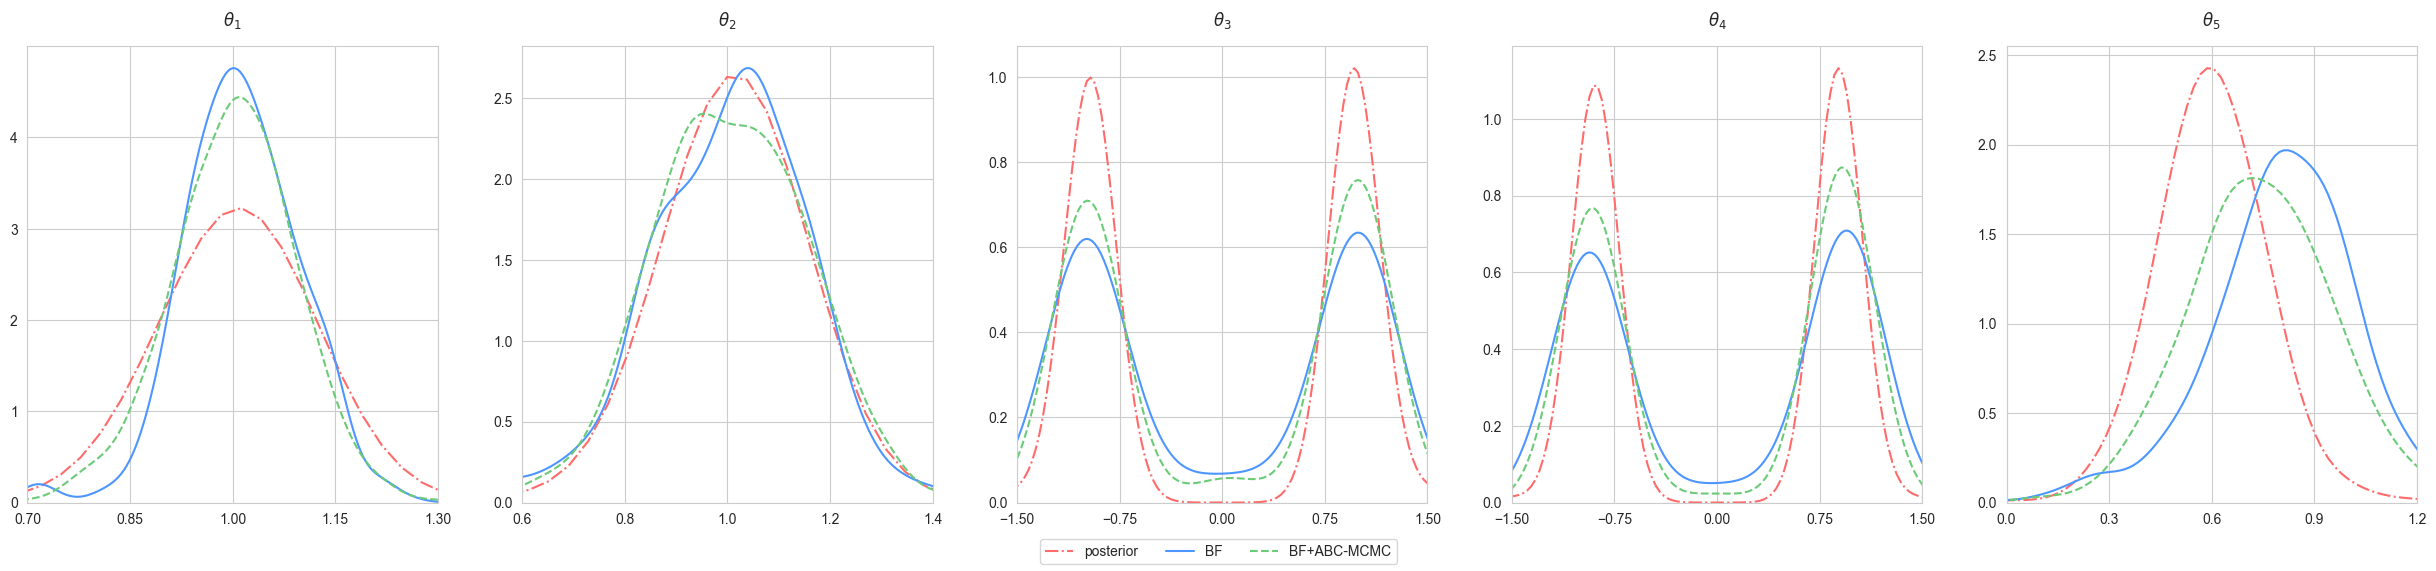

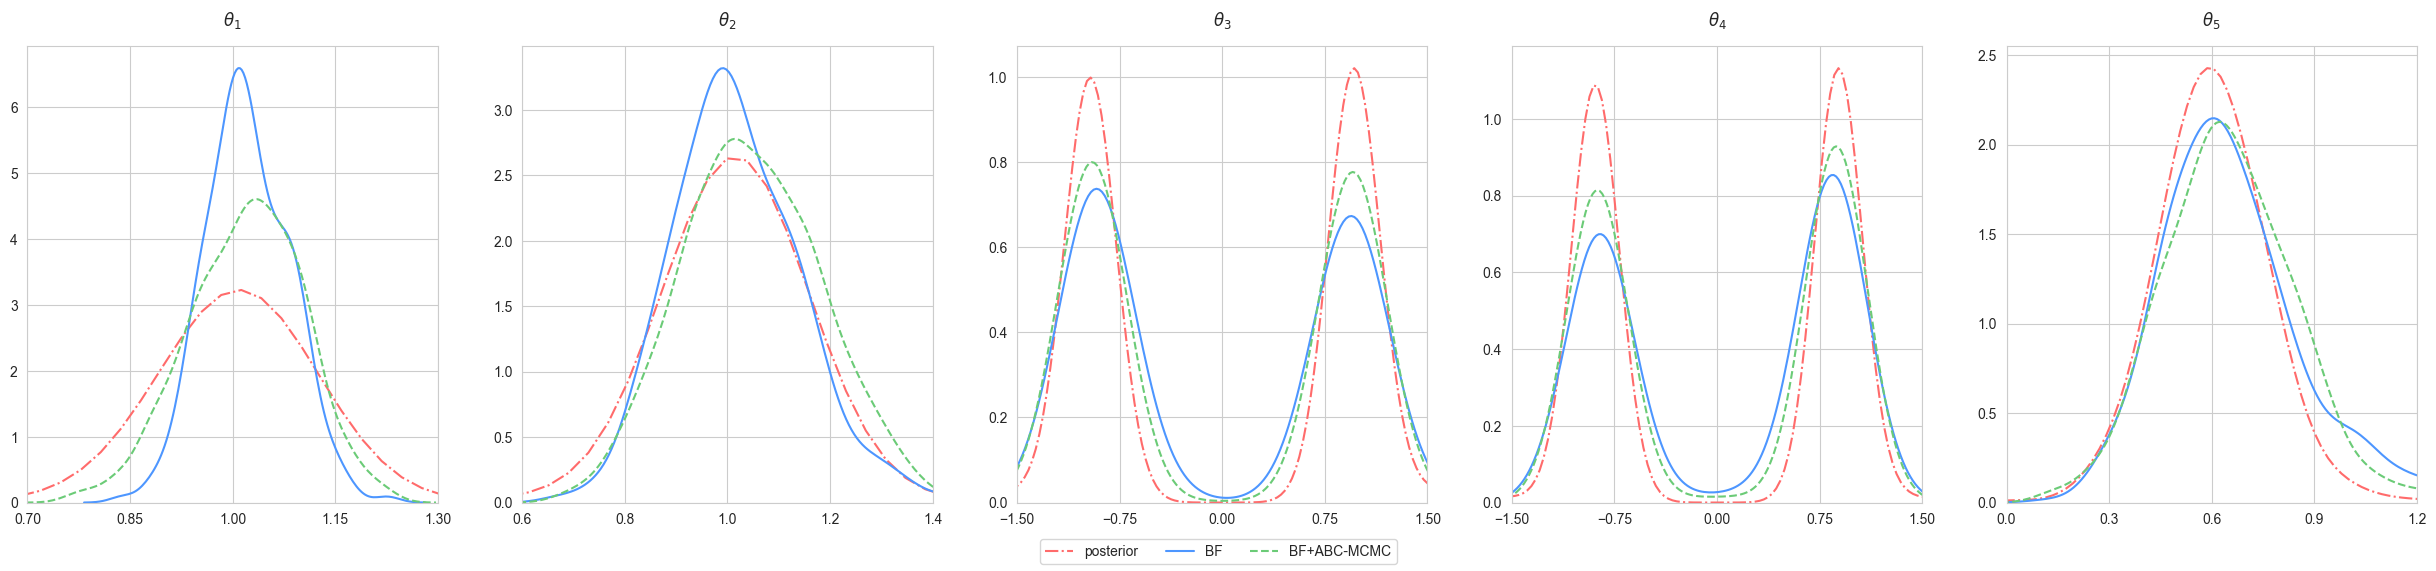

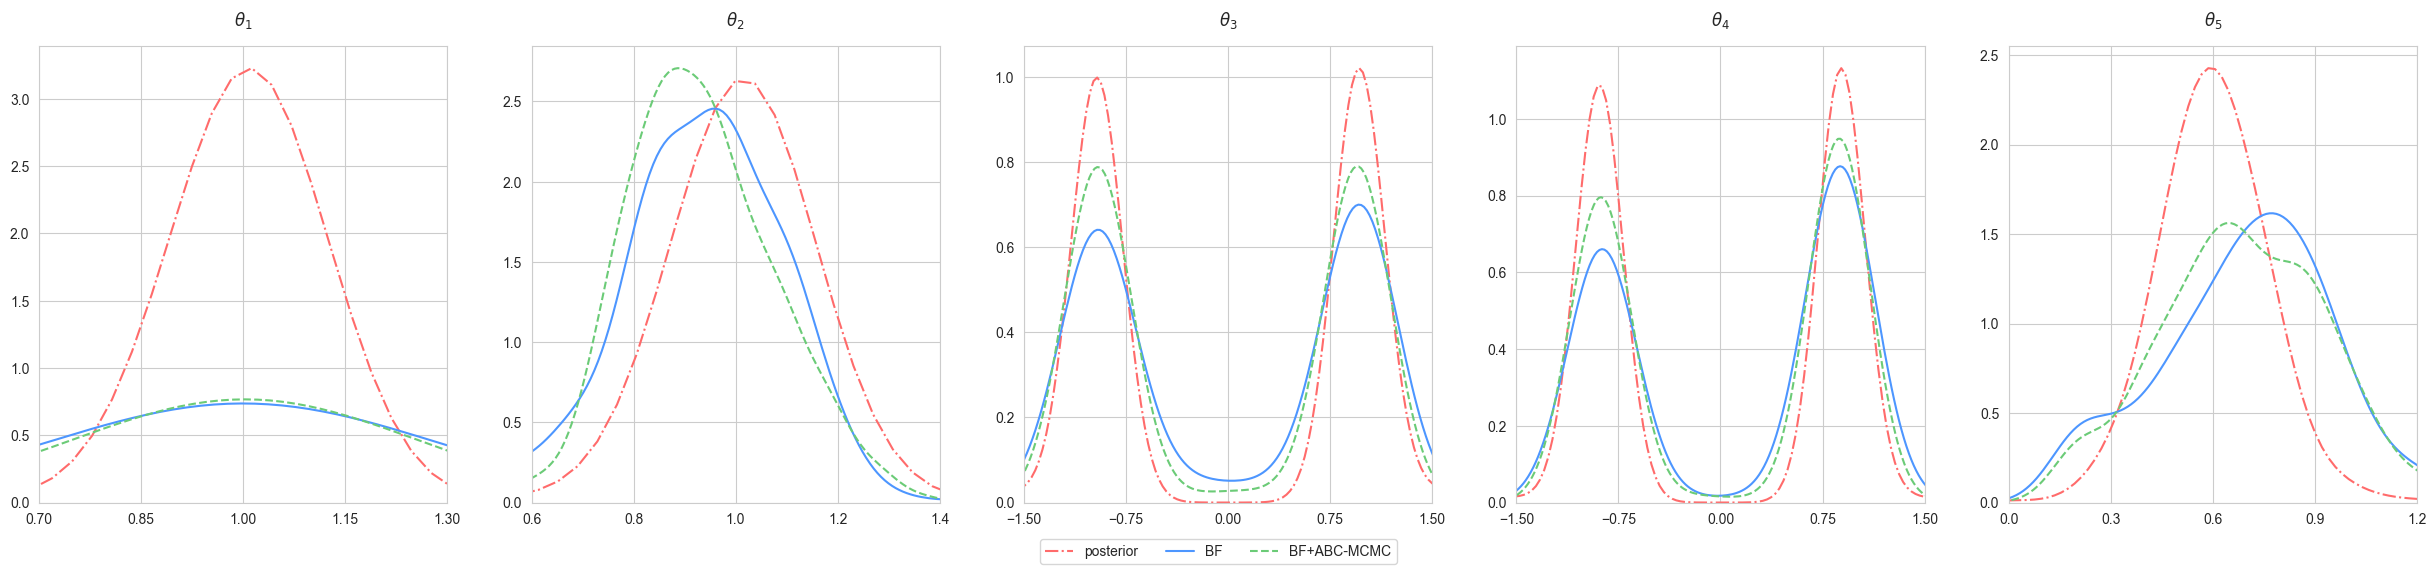

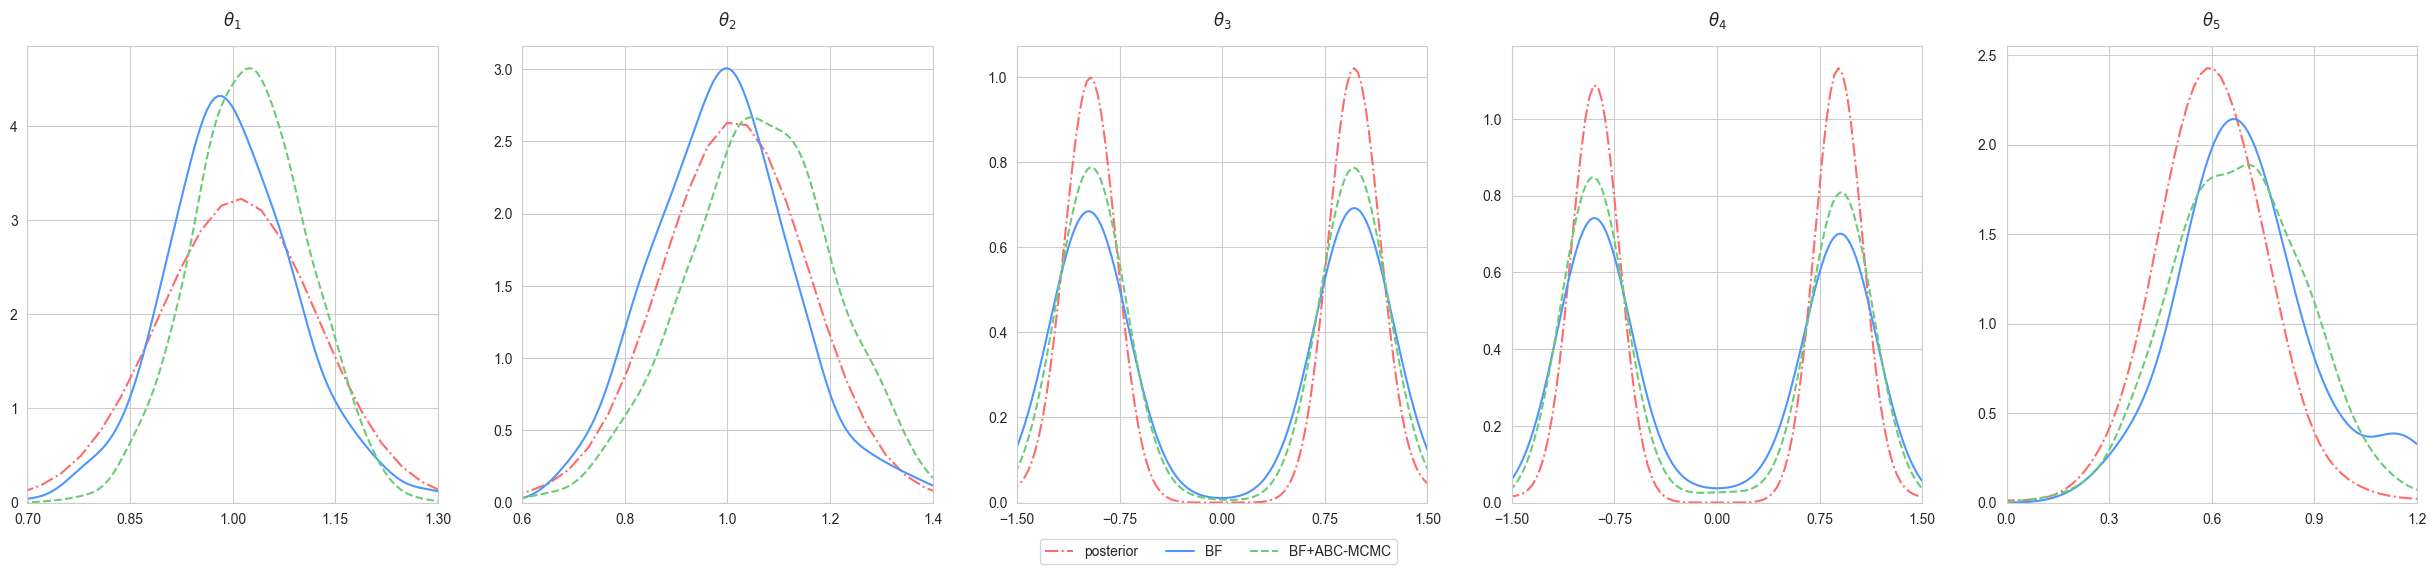

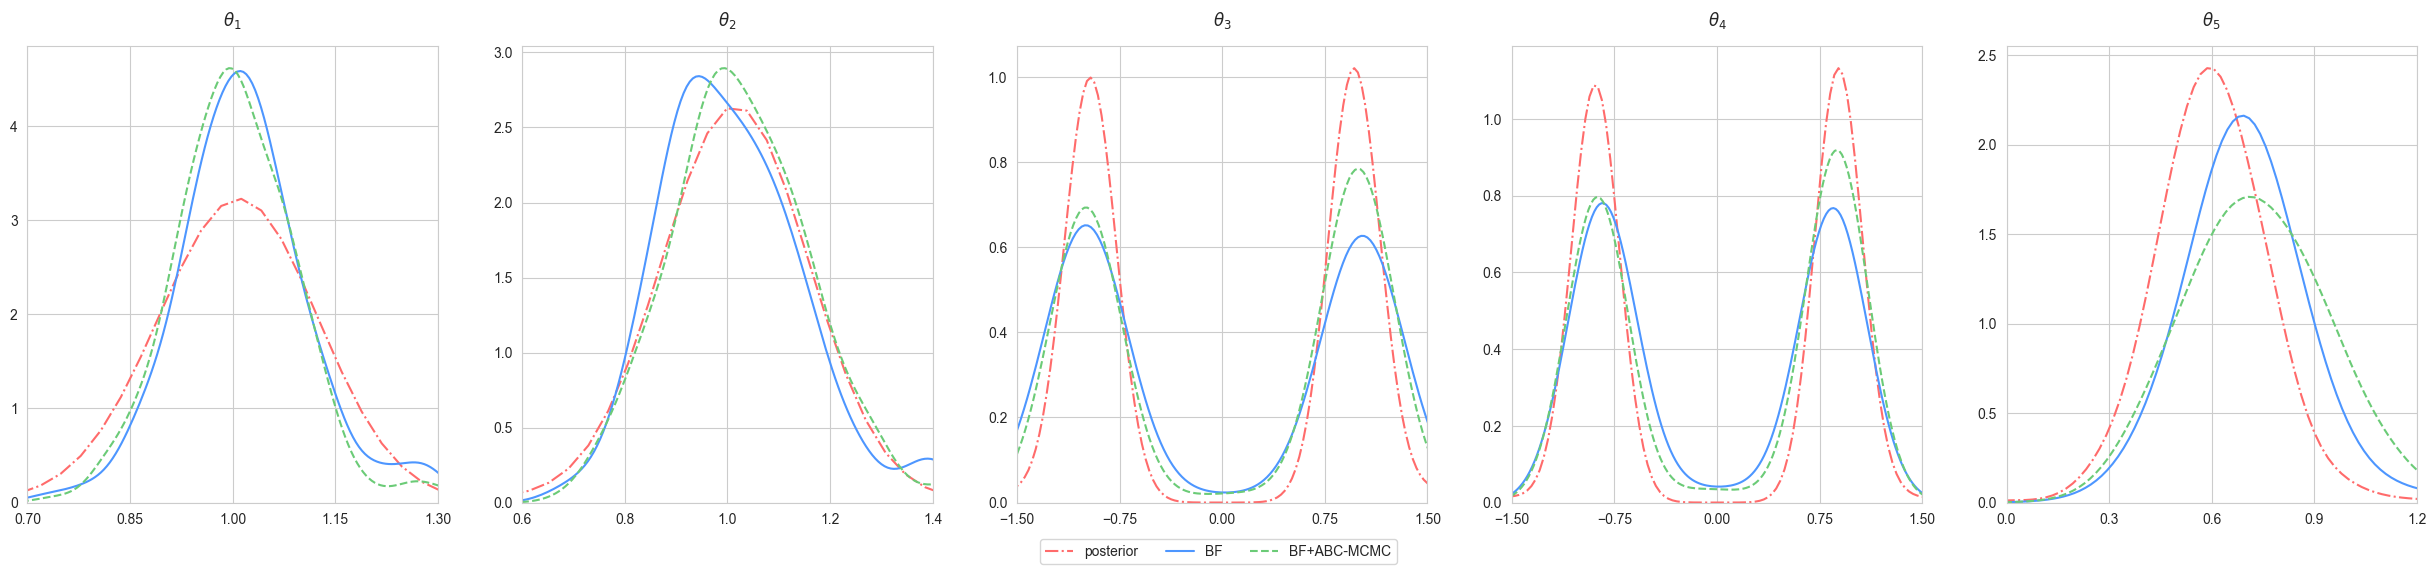

In [37]:
for k in range(10):
    bf_mcmc_samples_path = os.path.join(os.getcwd(), 'result','bf_mcmc_samples')
    kth_mcmc_samples_path = os.path.join(bf_mcmc_samples_path, f'bf_50_mcmc_samples_{k}.npy')
    mcmc_samples_total = np.load(kth_mcmc_samples_path)
    mcmc_samples = mcmc_samples_total[348]

    bf_ps_samples_path = os.path.join(os.getcwd(), 'result','bf_ps')
    bf_kth_ps_path = os.path.join(bf_ps_samples_path, f'bf_50_ps_{k}.npy')
    bf_ps_samples = np.load(bf_kth_ps_path)

    plot(mcmc_samples,bf_ps_samples,true_posterior_samples)